# Mask R-CNN demo

This notebook illustrates one possible way of using `maskrcnn_benchmark` for computing predictions on images from an arbitrary URL.

Let's start with a few standard imports

In [98]:

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import requests
from io import BytesIO
from PIL import Image
import numpy as np

In [99]:

# this makes our figures bigger
pylab.rcParams['figure.figsize'] = 20, 12

Those are the relevant imports for the detection model

In [100]:
from maskrcnn_benchmark.config import cfg
from predictor import COCODemo

We provide a helper class `COCODemo`, which loads a model from the config file, and performs pre-processing, model prediction and post-processing for us.

We can configure several model options by overriding the config options.
In here, we make the model run on the CPU

In [101]:
config_file = "../configs/caffe2/e2e_mask_rcnn_R_50_FPN_1x_caffe2.yaml"

# update the config options with the config file
cfg.merge_from_file(config_file)
# manual override some options
cfg.merge_from_list(["MODEL.DEVICE", "cpu"])

Now we create the `COCODemo` object. It contains a few extra options for conveniency, such as the confidence threshold for detections to be shown.

In [102]:
coco_demo = COCODemo(
    cfg,
    min_image_size=800,
    confidence_threshold=0.7,
)

RuntimeError: Error(s) in loading state_dict for GeneralizedRCNN:
	size mismatch for rpn.head.1.bbox_pred.weight: copying a param with shape torch.Size([324, 1024]) from checkpoint, the shape in current model is torch.Size([12, 96, 1, 1]).
	size mismatch for rpn.head.1.bbox_pred.bias: copying a param with shape torch.Size([324]) from checkpoint, the shape in current model is torch.Size([12]).
	size mismatch for roi_heads.box.predictor.cls_score.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([2, 1024]).
	size mismatch for roi_heads.box.predictor.cls_score.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([2]).
	size mismatch for roi_heads.box.predictor.bbox_pred.weight: copying a param with shape torch.Size([324, 1024]) from checkpoint, the shape in current model is torch.Size([8, 1024]).
	size mismatch for roi_heads.box.predictor.bbox_pred.bias: copying a param with shape torch.Size([324]) from checkpoint, the shape in current model is torch.Size([8]).
	size mismatch for roi_heads.mask.predictor.mask_fcn_logits.weight: copying a param with shape torch.Size([81, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([2, 256, 1, 1]).
	size mismatch for roi_heads.mask.predictor.mask_fcn_logits.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([2]).

Let's define a few helper functions for loading images from a URL

In [86]:
def load(url):
    """
    Given an url of an image, downloads the image and
    returns a PIL image
    """
    response = requests.get(url)
    pil_image = Image.open(BytesIO(response.content)).convert("RGB")
    # convert to BGR format
    image = np.array(pil_image)[:, :, [2, 1, 0]]
    return image

def imshow(img):
    plt.imshow(img[:, :, [2, 1, 0]])
    plt.axis("off")
    

Let's now load an image from the COCO dataset. It's reference is in the comment

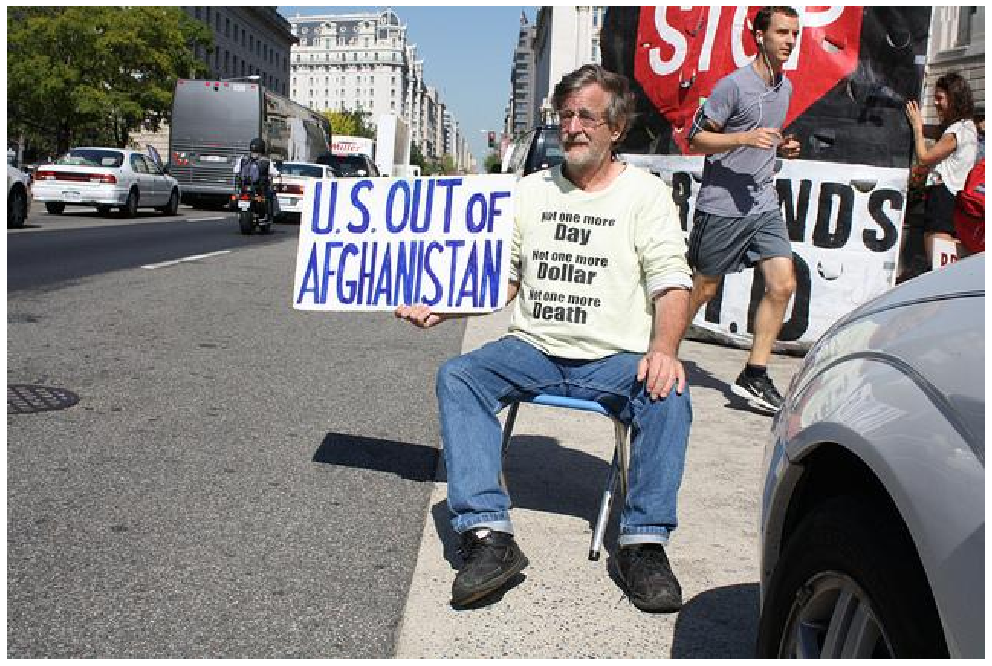

In [87]:
# from http://cocodataset.org/#explore?id=345434
image = cv2.imread("/home/zoey/nas/zoey/github/maskrcnn-benchmark/datasets/coco/train2014/COCO_train2014_000000057663.jpg")
imshow(image)


### Computing the predictions

We provide a `run_on_opencv_image` function, which takes an image as it was loaded by OpenCV (in `BGR` format), and computes the predictions on them, returning an image with the predictions overlayed on the image.

(427, 640, 3)


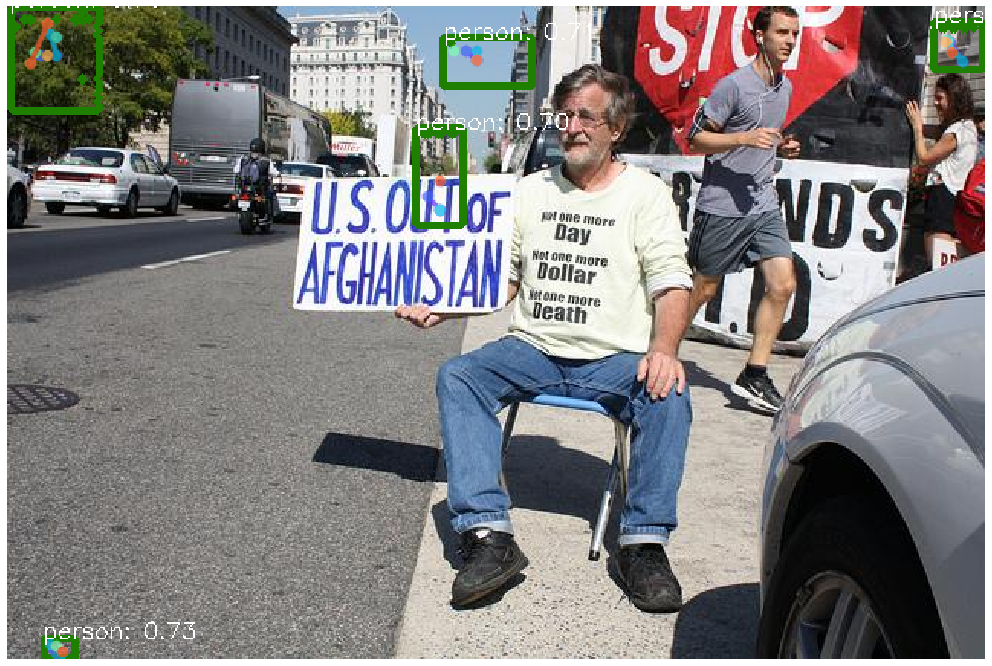

In [88]:
# compute predictions
predictions = coco_demo.run_on_opencv_image(image)
print(predictions.shape)
imshow(predictions)

## Keypoints Demo

In [64]:
# set up demo for keypoints
config_file = "../configs/caffe2/e2e_keypoint_rcnn_R_50_FPN_1x_caffe2.yaml"
cfg.merge_from_file(config_file)
cfg.merge_from_list(["MODEL.DEVICE", "cpu"])
cfg.merge_from_list(["MODEL.MASK_ON", False])

coco_demo = COCODemo(
    cfg,
    min_image_size=800,
    confidence_threshold=0.7,
)

RuntimeError: Error(s) in loading state_dict for GeneralizedRCNN:
	size mismatch for rpn.head.1.bbox_pred.weight: copying a param with shape torch.Size([8, 1024]) from checkpoint, the shape in current model is torch.Size([12, 96, 1, 1]).
	size mismatch for rpn.head.1.bbox_pred.bias: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([12]).

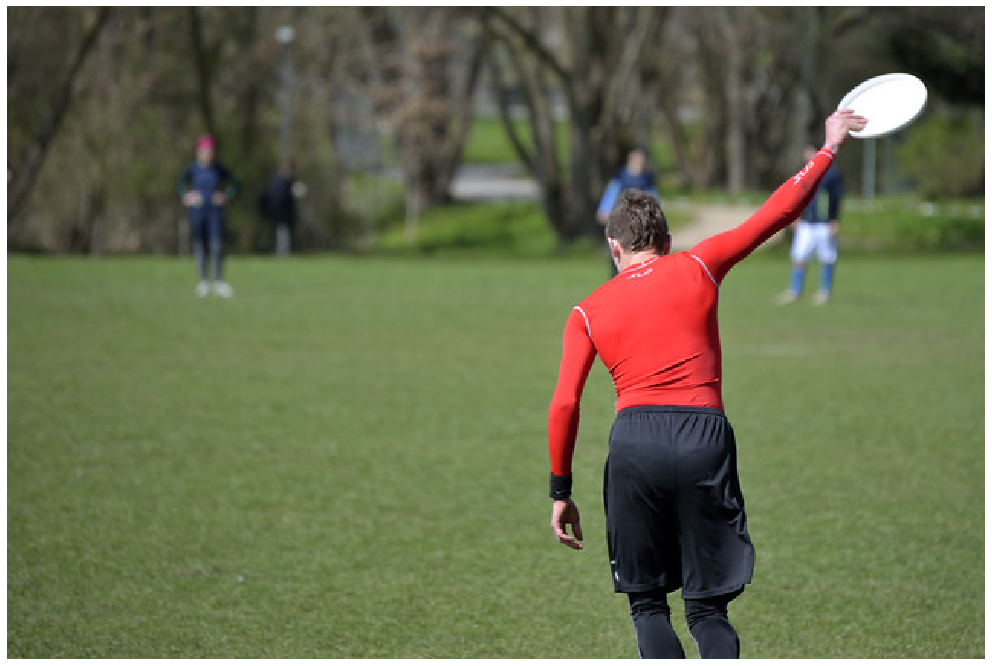

In [39]:
# run demo
image = load("http://farm9.staticflickr.com/8419/8710147224_ff637cc4fc_z.jpg")
predictions = coco_demo.run_on_opencv_image(image)
imshow(predictions)